# Implementación de Algoritmo de Deutsch y Deutsch-Jozsa

#### Autor: Camilo Andrés Quintero Rodríguez


### 1. Implemente las 4 funciones posibles de {0,1} a {0,1} usando el computador cuántico de IBM.

- Dibujo de función

- Matriz correpondiente

- Circuito correspondiente

- Resultados de las 4 pruebas



Dibujo para la primera función donde f(0) = 0 y f(1) = 1, podemos decir que es una funcion balanceada:

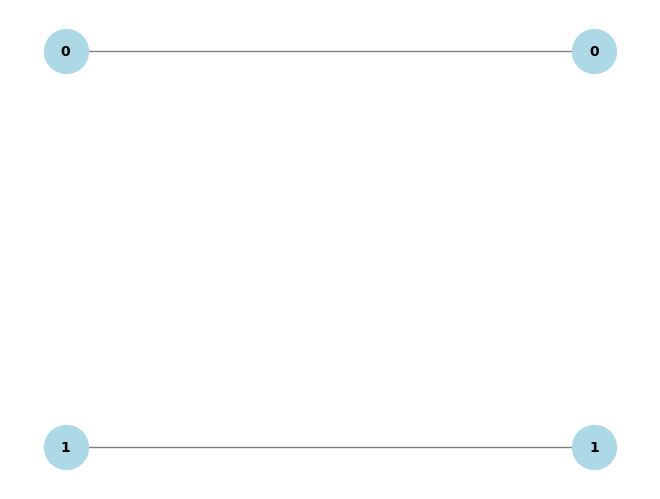

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["0", "1"]  
nodes_right = ["0", "1"]  

G.add_node("0")
G.add_node("1")
G.add_node("0r")
G.add_node("1r")

G.add_edge("0", "0r")
G.add_edge("1", "1r")

pos = {
    "0r": (0.1, 0.1),  
    "1r": (0.1, -0.1),  
    "0": (0, 0.1),    
    "1": (0, -0.1)  
}

labels = {
    "0r": "0",
    "1r": "1",
    "0": "0",
    "1": "1"
}


nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=1000, 
    node_color="lightblue", font_size=10, font_weight="bold", 
    edge_color="gray"
)

plt.show()

Matriz correspondiente para la primer funcion: 

Podemos representar la funcion mediante la siguiente matriz:

\begin{array}{ccc}
1 & 0  \\
0 & 1 
\end{array}


Ahora bien, para crear el circuito debemos conocerla matriz $U_{f}$, para esto, usaremos el sigueinte circuito, este procedimiento lo realizaremos para las demás funciones:

![Calculo de Uf](imgs/imagen1.png)

Así, matriz que representa la funcion $U_{f}$ resulta: 

\begin{array}{ccc}
1 & 0  & 0 & 0 \\
0 & 1  & 0 & 0 \\
0 & 0  & 0 & 1 \\
0 & 0  & 1 & 0 
\end{array}

Ahora, el circuito correspondinte resulta siendo el siguiente:

Para representar la funcion balanceada donde f(x) = x, pues f(0) = 0 y f(1) = 1, podemos usar la compuertar Not controlada, donde invertimos el qubit objetivo si el qubit obetivo es 1.

Para comprender la compuerta podemos tener en cuenta la siguiente tabla:

| Qubit Control | Qubit Objetivo | Resultado |
|---------------|----------------|-----------|
| 0             | 0               | 0, 0     |
| 0             | 1               | 0, 1     |
| 1             | 0               | 1, 1     |
| 1             | 1               | 1, 0     |

Podemos ver que representa la matriz de la función $U_{f}$  para la primer función balanceada



In [86]:

import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

# Crear un circuito cuántico que actúe sobre el registro cuántico
circuit = QuantumCircuit(2, 2)

# Agregar una puerta CX (CNOT) con el qubit 0 como control y el qubit 1 como objetivo
circuit.cx(0, 1)

# Mapear la medición cuántica a los bits clásicos
circuit.measure([0, 1], [0, 1])

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)




Total de conteos para 00 y 11 son: {'00': 1000}
          ┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


Sin embargo, ahora vamos a modelar el circuito y a realizar las pruebas correspondientes aplicando la matriz propia $U_{f}$ y no compuertas alternas para representar la matriz de la funcion $U_{f}$:

In [3]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
from qiskit.visualization import circuit_drawer, plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import numpy as np


f1=np.array([   [1,0,0,0],
                [0,1,0,0],
                [0,0,0,1],
                [0,0,1,0]])

def circuito(q0, q1, matriz):

    circuit = QuantumCircuit(2, 2)
    
    if q0 is not None:
        circuit.x(0)  
    if q1 is not None:
        circuit.x(1)  
    
    circuit.unitary(Operator(matriz), [1, 0], label="Función")

    circuit.measure(0, 1)
    circuit.measure(1, 0)

    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(circuit, simulator)  
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    if(q0 == None and q1 == None):
        print("Resultados de la medición para q0 = 0, q1 = 0:", counts)
    elif(q0 == None and q1 == 1):
        print("Resultados de la medición para q0 = 0, q1 = 1:", counts)
    elif(q0 == 1 and q1 == None):
        print("Resultados de la medición para q0 = 1, q1 = 0:", counts)
    elif(q0 == 1 and q1 == 1):
        print("Resultados de la medición para q0 = 1, q1 = 1:", counts)

    print("\nCircuito cuántico:")
    print(circuit_drawer(circuit, output='text'))

#Pruebas

"0,0"
circuito(None,None,f1)

"0,1"
circuito(None,1,f1)

"1,0"
circuito(1,None,f1)

"1,1"
circuito(1,1,f1)

Resultados de la medición para q0 = 0, q1 = 0: {'00': 1024}

Circuito cuántico:
     ┌──────────┐┌─┐   
q_0: ┤1         ├┤M├───
     │  Función │└╥┘┌─┐
q_1: ┤0         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  1  0 
Resultados de la medición para q0 = 0, q1 = 1: {'01': 1024}

Circuito cuántico:
          ┌──────────┐┌─┐   
q_0: ─────┤1         ├┤M├───
     ┌───┐│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0         ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 0: {'11': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     └───┘│  Función │└╥┘┌─┐
q_1: ─────┤0         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 1: {'10': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     ├───┤│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0       

Podemos ver que el circuito es correcto, pues podemos formar la matriz con el computador cuantico, ya que los valores de salida corresponden a los vaores de la matriz. 

Dibujo para la segunda función donde f(0) = 1 y f(1) = 0, podemos decir que es una funcion balanceada:

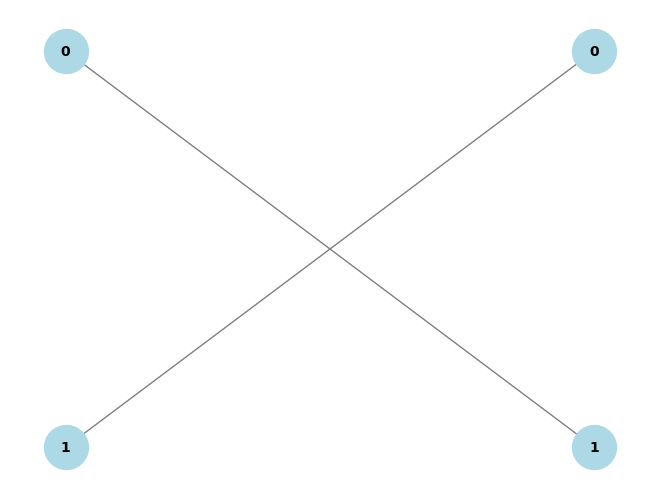

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["0", "1"]  
nodes_right = ["0", "1"]  

G.add_node("0")
G.add_node("1")
G.add_node("0r")
G.add_node("1r")

G.add_edge("0", "1r")
G.add_edge("1", "0r")

pos = {
    "0r": (0.1, 0.1),  
    "1r": (0.1, -0.1),  
    "0": (0, 0.1),    
    "1": (0, -0.1)  
}

labels = {
    "0r": "0",
    "1r": "1",
    "0": "0",
    "1": "1"
}


nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=1000, 
    node_color="lightblue", font_size=10, font_weight="bold", 
    edge_color="gray"
)

plt.show()

Matriz correspondiente para la segunda funcion: 

Podemos representar la funcion mediante la siguiente matriz:

\begin{array}{ccc}
0 & 1  \\
1 & 0 
\end{array}

La matriz que representa la funcion $U_{f}$ resulta: 

\begin{array}{ccc}
0 & 1  & 0 & 0 \\
1 & 0  & 0 & 0 \\
0 & 0  & 1 & 0 \\
0 & 0  & 0 & 1 
\end{array}

Ahora, el circuito correspondinte resulta siendo el siguiente:

Para represetnar el circuito en quiskit donde la funcion comple que f(x) = x XOR 1, la compuerta que podemos usar es

Si observamos, aplicando primero la compuerta Not controlada tenemos la sigueinte relación:

| Qubit Control | Qubit Objetivo | Resultado |
|---------------|----------------|-----------|
| 0             | 0              | 0, 0     |
| 0             | 1              | 0, 1     |
| 1             | 0              | 1, 1     |
| 1             | 1              | 1, 0     |

Ahora, si aplicamos la compuerta x al segundo compontente (y), tenemos la siguinte relacion donde obtenemos la matriz $U_{f}$ de la segunda funcion:

| x | y | Resultado |
|---------------|----------------|-----------|
| 0             | 0              | 0, 1     |
| 0             | 1              | 0, 0     |
| 1             | 0              | 1, 0     |
| 1             | 1              | 1, 1     |

In [99]:


import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

# Crear un circuito cuántico que actúe sobre el registro cuántico
circuit = QuantumCircuit(2, 2)


# Agregar una puerta CX (CNOT) con el qubit 0 como control y el qubit 1 como objetivo
circuit.cx(0, 1)  
circuit.x(1)
# Mapear la medición cuántica a los bits clásicos
circuit.measure([0, 1], [0, 1])

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)

  




Total de conteos para 00 y 11 son: {'10': 1000}
               ┌─┐   
q_0: ──■───────┤M├───
     ┌─┴─┐┌───┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


Sin embargo, ahora vamos a modelar el circuito y a realizar las pruebas correspondientes aplicando la matriz propia $U_{f}$ y no compuertas alternas para representar la matriz de la funcion $U_{f}$:

In [4]:
# Implementamos la matriz correspondiente a la funcion Uf
f2=np.array([   [0,1,0,0],
                [1,0,0,0],
                [0,0,1,0],
                [0,0,0,1]])

#Dibujamos el circuito y realizamos pruebas

"0,0"
circuito(None,None,f2)

"0,1"
circuito(None,1,f2)

"1,0"
circuito(1,None,f2)

"1,1"
circuito(1,1,f2)

Resultados de la medición para q0 = 0, q1 = 0: {'01': 1024}

Circuito cuántico:
     ┌──────────┐┌─┐   
q_0: ┤1         ├┤M├───
     │  Función │└╥┘┌─┐
q_1: ┤0         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  1  0 
Resultados de la medición para q0 = 0, q1 = 1: {'00': 1024}

Circuito cuántico:
          ┌──────────┐┌─┐   
q_0: ─────┤1         ├┤M├───
     ┌───┐│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0         ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 0: {'10': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     └───┘│  Función │└╥┘┌─┐
q_1: ─────┤0         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 1: {'11': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     ├───┤│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0       

Podemos ver que el circuito es correcto, pues podemos formar la matriz con el computador cuantico, ya que los valores de salida corresponden a los vaores de la matriz. 

Dibujo para la tercera funcion donde f(0) = f(1) = 0, podemos decir que es una función constante:

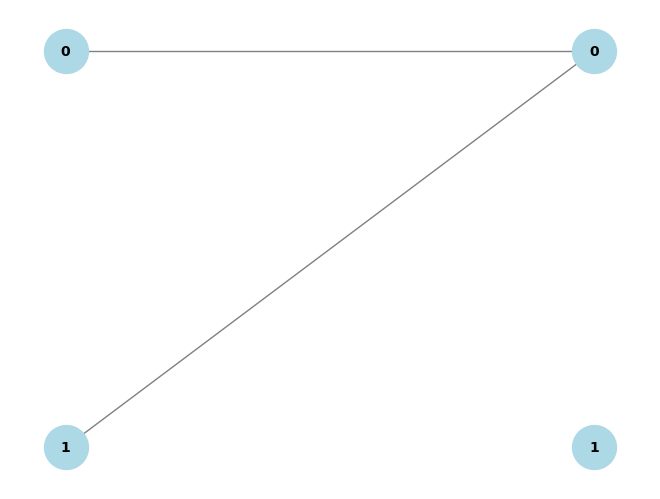

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["0", "1"]  
nodes_right = ["0", "1"]  

G.add_node("0")
G.add_node("1")
G.add_node("0r")
G.add_node("1r")

G.add_edge("0", "0r")
G.add_edge("1", "0r")

pos = {
    "0r": (0.1, 0.1),  
    "1r": (0.1, -0.1),  
    "0": (0, 0.1),    
    "1": (0, -0.1)  
}

labels = {
    "0r": "0",
    "1r": "1",
    "0": "0",
    "1": "1"
}


nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=1000, 
    node_color="lightblue", font_size=10, font_weight="bold", 
    edge_color="gray"
)

plt.show()

Matriz correspondiente para la tercer funcion: 

Podemos representar la funcion mediante la siguiente matriz:

\begin{array}{ccc}
1 & 1  \\
0 & 0 
\end{array}

La matriz que representa la funcion $U_{f}$ resulta: 

\begin{array}{ccc}
1 & 0  & 0 & 0 \\
0 & 1  & 0 & 0 \\
0 & 0  & 1 & 0 \\
0 & 0  & 0 & 1 
\end{array}

Ahora, el circuito correspondinte resulta siendo el siguiente:

Podemos ver que la matriz que representa la funcion $U_{f}$ es una matriz identidad, de esta forma, podemos usar la operacion nula "pass" para representar esta funcion en el circuito. Sin embargo, esto seria mas sencillo si el tipo de comperta fuera un atributo de una funcion propuesta para indicar que tipo de compuerta logica me ayuda a represetar $U_{f}$, así que en este caso, no usaremos el pass, sencillamente no colocaremos compuerta. Aunque otra opcion es aplicar la matriz identidad tanto a x como y. Optaremos por la primer opción.

In [94]:


import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

# Crear un circuito cuántico que actúe sobre el registro cuántico
circuit = QuantumCircuit(2, 2)

# Mapear la medición cuántica a los bits clásicos
circuit.measure([0, 1], [0, 1])

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)

  




Total de conteos para 00 y 11 son: {'00': 1000}
     ┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1 


Sin embargo, ahora vamos a modelar el circuito y a realizar las pruebas correspondientes aplicando la matriz propia $U_{f}$ y no compuertas alternas para representar la matriz de la funcion $U_{f}$:

In [5]:
# Implementamos la matriz correspondiente a la funcion Uf
f3=np.array([   [1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])

#Dibujamos el circuito y realizamos pruebas

"0,0"
circuito(None,None,f3)

"0,1"
circuito(None,1,f3)

"1,0"
circuito(1,None,f3)

"1,1"
circuito(1,1,f3)

Resultados de la medición para q0 = 0, q1 = 0: {'00': 1024}

Circuito cuántico:
     ┌──────────┐┌─┐   
q_0: ┤1         ├┤M├───
     │  Función │└╥┘┌─┐
q_1: ┤0         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  1  0 
Resultados de la medición para q0 = 0, q1 = 1: {'01': 1024}

Circuito cuántico:
          ┌──────────┐┌─┐   
q_0: ─────┤1         ├┤M├───
     ┌───┐│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0         ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 0: {'10': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     └───┘│  Función │└╥┘┌─┐
q_1: ─────┤0         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 1: {'11': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     ├───┤│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0       

Dibujo para la cuarta función donde f(1) = f(0) = 1, podemos decir que es una función constante:

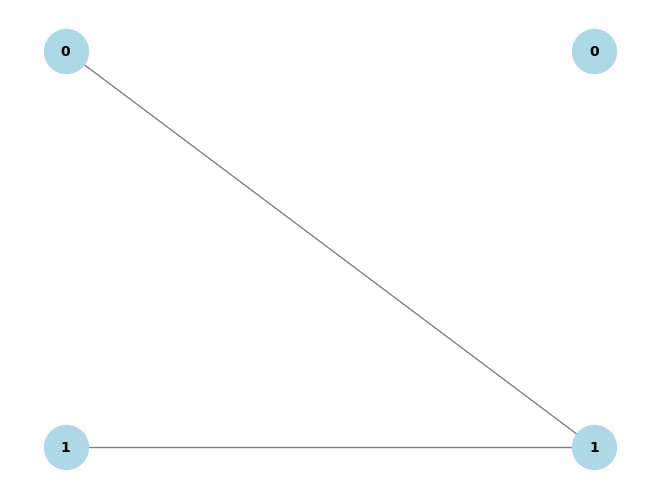

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["0", "1"]  
nodes_right = ["0", "1"]  

G.add_node("0")
G.add_node("1")
G.add_node("0r")
G.add_node("1r")

G.add_edge("0", "1r")
G.add_edge("1", "1r")

pos = {
    "0r": (0.1, 0.1),  
    "1r": (0.1, -0.1),  
    "0": (0, 0.1),    
    "1": (0, -0.1)  
}

labels = {
    "0r": "0",
    "1r": "1",
    "0": "0",
    "1": "1"
}


nx.draw(
    G, pos, with_labels=True, labels=labels, node_size=1000, 
    node_color="lightblue", font_size=10, font_weight="bold", 
    edge_color="gray"
)

plt.show()

Matriz correspondiente para la cuarta funcion: 

Podemos representar la funcion mediante la siguiente matriz:

\begin{array}{ccc}
0 & 0  \\
1 & 1 
\end{array}

La matriz que representa la funcion $U_{f}$ resulta: 

\begin{array}{ccc}
0 & 1  & 0 & 0 \\
1 & 0  & 0 & 0 \\
0 & 0  & 0 & 1 \\
0 & 0  & 1 & 0
\end{array}

Ahora, el circuito correspondinte resulta siendo el siguiente:

Para conseguir el circuito de esta funcion, podemos representar la función $U_{f}$ podemos usar la compuerta Not al segundo qubit, podmeos ver el comportamiento de los qubits cuando aplicamos esta compuerta logica:

| x | y | Resultado |
|---------------|----------------|-----------|
| 0             | 0              | 0, 1     |
| 0             | 1              | 0, 0     |
| 1             | 0              | 1, 1    |
| 1             | 1              | 1, 0     |

In [6]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

# Crear un circuito cuántico que actúe sobre el registro cuántico
circuit = QuantumCircuit(2, 2)

# Agregar una puerta H en el qubit 0

circuit.x(1)
# Mapear la medición cuántica a los bits clásicos
circuit.measure([0, 1], [0, 1])

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)

  



Total de conteos para 00 y 11 son: {'10': 1000}
          ┌─┐   
q_0: ─────┤M├───
     ┌───┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


Sin embargo, ahora vamos a modelar el circuito y a realizar las pruebas correspondientes aplicando la matriz propia $U_{f}$ y no compuertas alternas para representar la matriz de la funcion $U_{f}$:

In [7]:
# Implementamos la matriz correspondiente a la funcion Uf
f4=np.array([   [0,1,0,0],
                [1,0,0,0],
                [0,0,0,1],
                [0,0,1,0]])

#Dibujamos el circuito y realizamos pruebas

"0,0"
circuito(None,None,f4)

"0,1"
circuito(None,1,f4)

"1,0"
circuito(1,None,f4)

"1,1"
circuito(1,1,f4)

Resultados de la medición para q0 = 0, q1 = 0: {'01': 1024}

Circuito cuántico:
     ┌──────────┐┌─┐   
q_0: ┤1         ├┤M├───
     │  Función │└╥┘┌─┐
q_1: ┤0         ├─╫─┤M├
     └──────────┘ ║ └╥┘
c: 2/═════════════╩══╩═
                  1  0 
Resultados de la medición para q0 = 0, q1 = 1: {'00': 1024}

Circuito cuántico:
          ┌──────────┐┌─┐   
q_0: ─────┤1         ├┤M├───
     ┌───┐│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0         ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 0: {'11': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     └───┘│  Función │└╥┘┌─┐
q_1: ─────┤0         ├─╫─┤M├
          └──────────┘ ║ └╥┘
c: 2/══════════════════╩══╩═
                       1  0 
Resultados de la medición para q0 = 1, q1 = 1: {'10': 1024}

Circuito cuántico:
     ┌───┐┌──────────┐┌─┐   
q_0: ┤ X ├┤1         ├┤M├───
     ├───┤│  Función │└╥┘┌─┐
q_1: ┤ X ├┤0       

Podemos ver, igual que para las funciones anteriores, el resultado es correcto y el circuito fue implementado correctamente. 

### 2. Verifique que el algoritmos de Deutsch funciona para comprobar cuáles de estas funciones son balanceadas o constantes.

- Circuito 

- Resultados
  


##### Para la primer función (Balanceada)

Se implementará el algoritmo de Deutsch mediante la computadora de IBM, se usará la funcion $U_{f}$ que se halló en el primer punto, en este caso se usará la compuerta Not controlada para representarla:

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(2, 1)

circuit.x(1)

#Aplicamos H a los dos canales
circuit.h(0)
circuit.h(1)

# Aplicar Uf
circuit.cx(0,1)

# Aplicar H al primer qubit
circuit.h(0)

# Medir el primer qubit
circuit.measure(0, 0)

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)

# Graficar un histograma
plot_histogram(counts)
plt.show()



Total de conteos para 00 y 11 son: {'1': 1000}
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 


El resultado de la medicion del primer qubit es 1, entonces la función 𝑓 es balanceada.

##### Para la segunda función (Balanceada)

Se implementará el algoritmo de Deutsch mediante la computadora de IBM, se usará la funcion $U_{f}$ que se halló en el primer punto, en este caso se usarán la compuertas Not controlada y la compuerta Not en el segundo quit para representarla:

In [77]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(2, 1)

circuit.x(1)

circuit.h(0)
circuit.h(1)

# Aplicar Uf
circuit.cx(0, 1)  
circuit.x(1)

# Aplicar H al primer qubit
circuit.h(0)

# Medir el primer qubit
circuit.measure(0, 0)

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)

# Graficar un histograma
plot_histogram(counts)
plt.show()





Total de conteos para 00 y 11 son: {'1': 1000}
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐├───┤└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├─╫─
     └───┘└───┘└───┘└───┘ ║ 
c: 1/═════════════════════╩═
                          0 


El resultado de la medicion del primer qubit es 1, entonces la función 𝑓 es balanceada.

##### Para la tercera función (Contante)

Se implementará el algoritmo de Deutsch mediante la computadora de IBM, se usará la funcion $U_{f}$ que se halló en el primer punto, en este caso se usará la compuerta identidad (pass) para representarla:

In [78]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(2, 1)

circuit.x(1)

circuit.h(0)
circuit.h(1)


# Aplicar H al primer qubit
circuit.h(0)

# Medir el primer qubit
circuit.measure(0, 0)

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)

# Graficar un histograma
plot_histogram(counts)
plt.show()





Total de conteos para 00 y 11 son: {'0': 1000}
     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ H ├┤M├
     ├───┤├───┤└╥┘
q_1: ┤ X ├┤ H ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0 


El resultado de la medicion del primer qubit es 0, entonces la función 𝑓 es constante.

##### Para la cuarta función (Contante)

Se implementará el algoritmo de Deutsch mediante la computadora de IBM, se usará la funcion $U_{f}$ que se halló en el primer punto, en este caso se usará la compuerta Not en el qubit 2 para representarla:

In [ ]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Usar el simulador qasm de Aer
simulator = Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(2, 1)

circuit.x(1)

circuit.h(0)
circuit.h(1)

#Aplicamos Uf

circuit.x(1)

# Aplicar H al primer qubit
circuit.h(0)


# Medir el primer qubit
circuit.measure(0, 0)

# Compilar el circuito a instrucciones QASM de bajo nivel
# compatibles con el backend (no es necesario para circuitos simples)
compiled_circuit = transpile(circuit, simulator)

# Ejecutar el circuito en el simulador qasm
job = simulator.run(compiled_circuit, shots=1000)

# Obtener los resultados del trabajo
result = job.result()

# Retornar los conteos
counts = result.get_counts(circuit)
print("\nTotal de conteos para 00 y 11 son:", counts)

# Dibujar el circuito
print(circuit)

# Graficar un histograma
plot_histogram(counts)
plt.show()



Total de conteos para 00 y 11 son: {'0': 1000}
     ┌───┐┌───┐     ┌─┐
q_0: ┤ H ├┤ H ├─────┤M├
     ├───┤├───┤┌───┐└╥┘
q_1: ┤ X ├┤ H ├┤ X ├─╫─
     └───┘└───┘└───┘ ║ 
c: 1/════════════════╩═
                     0 


El resultado de la medicion del primer qubit es 0, entonces la función 𝑓 es constante.

Así mismo, implemneté y probé el algoritmo de Deustch con las matrices $U_{f}$ que calculamos anteriormente como se muestra a continuación:

In [10]:
#f(x) = x

"""
f1 =  |1 0 0 0| 
      |0 1 0 0|
      |0 0 0 1|
      |0 0 1 0|
"""
f1=np.array([   [1,0,0,0],
                [0,1,0,0],
                [0,0,0,1],
                [0,0,1,0]])

"""
f2 =  |0 1 0 0| 
      |1 0 0 0|
      |0 0 1 0|
      |0 0 0 1|
"""

#f(x) = x XSOR 1
f2=np.array([   [0,1,0,0],
                [1,0,0,0],
                [0,0,1,0],
                [0,0,0,1]])

"""
f3 =  |1 0 0 0| 
      |0 1 0 0|
      |0 0 1 0|
      |0 0 0 1|
"""
#f(x) = 0
f3=np.array([   [1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]])

"""
f4 =  |0 1 0 0| 
      |1 0 0 0|
      |0 0 0 1|
      |0 0 1 0|
"""
#f(x) = 1
f4=np.array([   [0,1,0,0],
                [1,0,0,0],
                [0,0,0,1],
                [0,0,1,0]])
funciones = [f1,f2,f3,f4]
I=np.array([   [1,0],
                [0,1]])
def deutsch(uf):

    circuit = QuantumCircuit(2, 1)
    
    circuit.unitary(Operator(I), [0], label="I")
    circuit.x(1)  
    circuit.h(0)
    circuit.h(1)  
    circuit.unitary(Operator(uf), [1, 0], label="Función")
    circuit.h(0)
    
    circuit.measure(0, 0)

    simulator = Aer.get_backend('aer_simulator')
    compiled_circuit = transpile(circuit, simulator)  
    result = simulator.run(compiled_circuit).result()
    counts = result.get_counts()
    print("Resultados de la medición", counts)

    print("\nCircuito cuántico:")
    print(circuit_drawer(circuit, output='text'))

for i in range (len(funciones)):
    print(f"Funcion{i + 1}")
    deutsch(funciones[i])


Funcion1
Resultados de la medición {'1': 1024}

Circuito cuántico:
     ┌───┐┌───┐┌──────────┐┌───┐┌─┐
q_0: ┤ I ├┤ H ├┤1         ├┤ H ├┤M├
     ├───┤├───┤│  Función │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤0         ├──────╫─
     └───┘└───┘└──────────┘      ║ 
c: 1/════════════════════════════╩═
                                 0 
Funcion2
Resultados de la medición {'1': 1024}

Circuito cuántico:
     ┌───┐┌───┐┌──────────┐┌───┐┌─┐
q_0: ┤ I ├┤ H ├┤1         ├┤ H ├┤M├
     ├───┤├───┤│  Función │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤0         ├──────╫─
     └───┘└───┘└──────────┘      ║ 
c: 1/════════════════════════════╩═
                                 0 
Funcion3
Resultados de la medición {'0': 1024}

Circuito cuántico:
     ┌───┐┌───┐┌──────────┐┌───┐┌─┐
q_0: ┤ I ├┤ H ├┤1         ├┤ H ├┤M├
     ├───┤├───┤│  Función │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤0         ├──────╫─
     └───┘└───┘└──────────┘      ║ 
c: 1/════════════════════════════╩═
                                 0 
Funcion4
Resultados de la medición {'0': 10

Como se puede evidenciar, los resultados coinciden con las anteriores pruebas y podemos determinar si las funciones son constantes o balanceadas. 

### 3. Implemente al menos 4 funciones con n= 4 (3 balanceadas y una constante) para probar el funcionamiento del algoritmo Deustch-Jozsa

- Dibujo función
  
- Matriz correspondiente (Generada por computador)

- Circuito

- Pruebas

- Prueba del experimento Deutsch-Jozsa
  


#### Dibujo de la primer funcion balanceada:

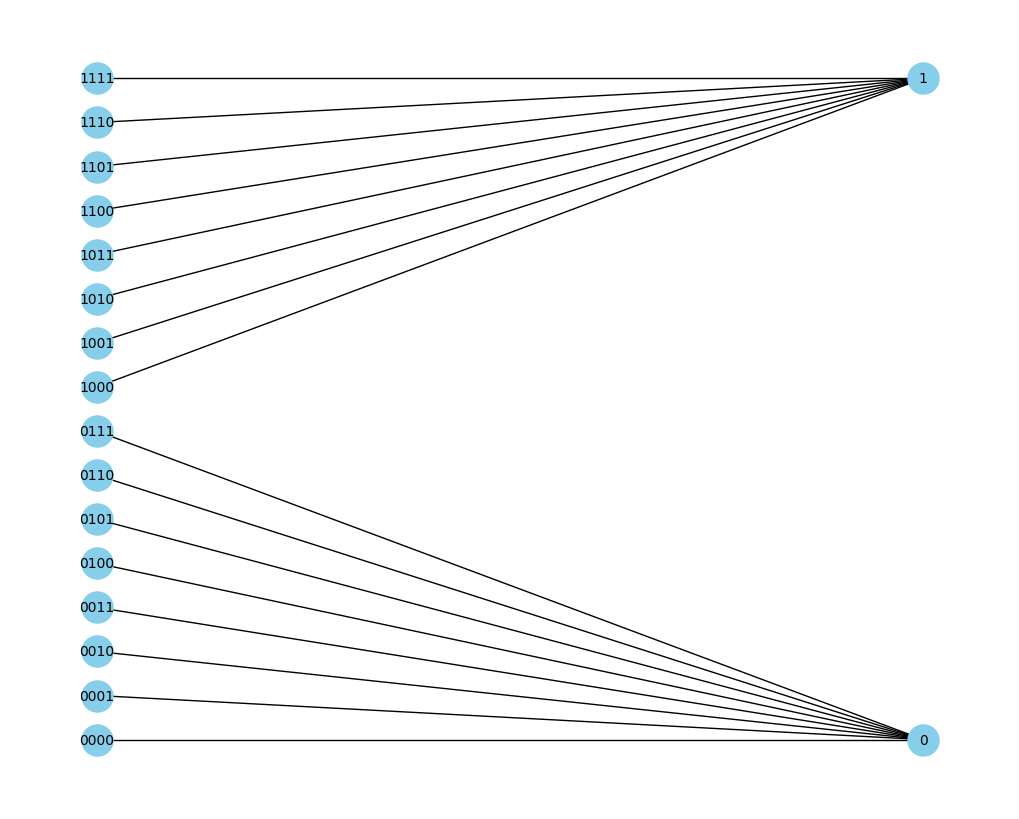

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["0000", "0001", "0010", "0011", "0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","1110","1111"]  
nodes_right = ["0", "1"]  

for node in nodes_left:
    G.add_node(node)

for node in nodes_right:
    G.add_node(node)

for i in range(len(nodes_left)//2):
    G.add_edge(nodes_left[i], "0")
for i in range(len(nodes_left)//2,len(nodes_left)):
    G.add_edge(nodes_left[i], "1")


pos = nx.drawing.layout.bipartite_layout(G, nodes_left)


plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
plt.show()


#### Matriz $U_{f}$ de la primer funcion balanceada:

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

#Funcion que convierte un entero a binario y lo completa por izquierda con ceros
def convertidor(value, n):
    num = bin(value)[2:]
    valor = str(num)

    faltantes = n - len(valor)

    Cadena = "0" * faltantes + valor 

    return Cadena
#Funcion que calcula el XSOR
def xsor(x,y):
    if (x==y):
        return "0"
    else:
        return "1"

nodes = {"0000" : "0", "0001" : "0", "0010" : "0", "0011" : "0", "0100" : "0","0101" : "0","0110" : "0","0111" : "0","1000" : "1","1001" : "1","1010" : "1","1011" : "1","1100" : "1","1101" : "1","1110" : "1","1111" : "1"}


matrizUf1 = [[0] * 32 for _ in range(32)]

for j in range(0,32):
    valor = (convertidor(j,5))
    x = valor[:4]
    y = valor[-1]
    resultado = x + xsor(y,nodes[x])
    #print (valor,x,y,resultado,int(resultado,2),int(valor,2))
    matrizUf1[int(resultado,2)][int(valor,2)] = 1
    


for fila in matrizUf1:
   print(fila)

matrizUf1 = np.array(matrizUf1)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Dibujo de la segunda funcion balanceada:

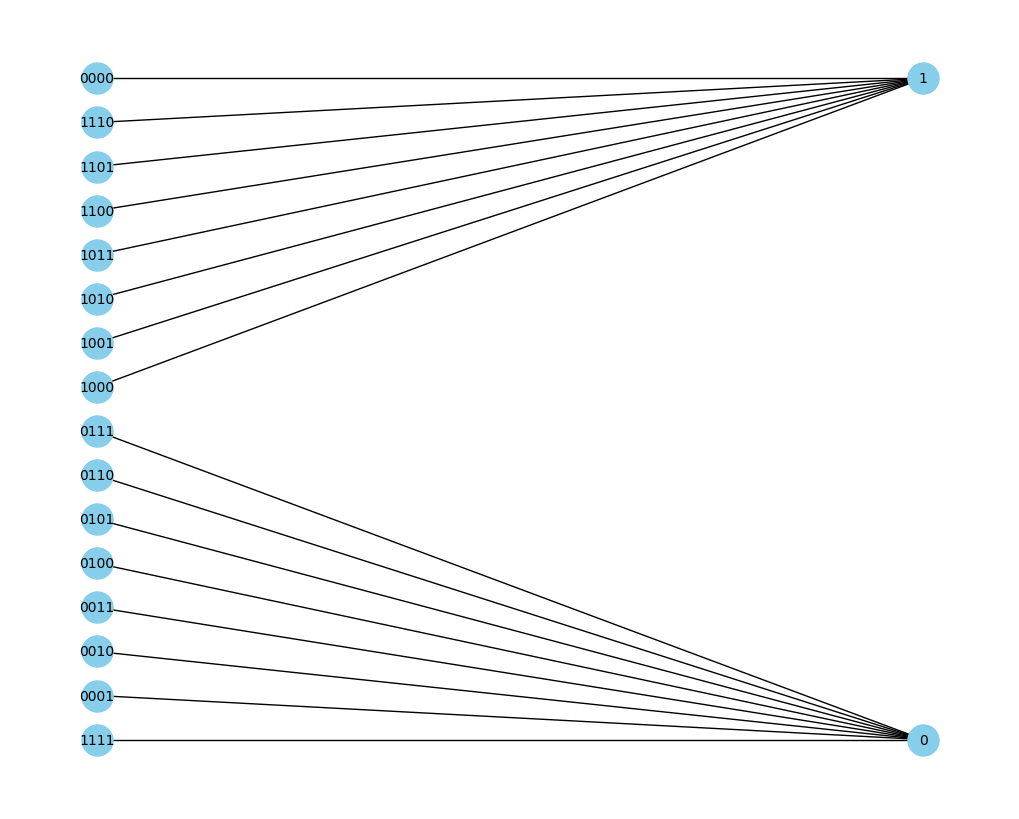

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["1111", "0001", "0010", "0011", "0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","1110","0000"]  
nodes_right = ["0", "1"]  

for node in nodes_left:
    G.add_node(node)

for node in nodes_right:
    G.add_node(node)

for i in range(len(nodes_left)//2):
    G.add_edge(nodes_left[i], "0")
for i in range(len(nodes_left)//2,len(nodes_left)):
    G.add_edge(nodes_left[i], "1")


pos = nx.drawing.layout.bipartite_layout(G, nodes_left)


plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
plt.show()


#### Matriz $U_{f}$ de la segunda funcion balanceada:

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

#Funcion que convierte un entero a binario y lo completa por izquierda con ceros
def convertidor(value, n):
    num = bin(value)[2:]
    valor = str(num)

    faltantes = n - len(valor)

    Cadena = "0" * faltantes + valor 

    return Cadena
#Funcion que calcula el XSOR
def xsor(x,y):
    if (x==y):
        return "0"
    else:
        return "1"

nodes = {"1111" : "0", "0001" : "0", "0010" : "0", "0011" : "0", "0100" : "0","0101" : "0","0110" : "0","0111" : "0","1000" : "1","1001" : "1","1010" : "1","1011" : "1","1100" : "1","1101" : "1","1110" : "1","0000" : "1"}


matrizUf2 = [[0] * 32 for _ in range(32)]

for j in range(0,32):
    valor = (convertidor(j,5))
    x = valor[:4]
    y = valor[-1]
    resultado = x + xsor(y,nodes[x])
    #print (valor,x,y,resultado,int(resultado,2),int(valor,2))
    matrizUf2[int(resultado,2)][int(valor,2)] = 1
    
    
for fila in matrizUf2:
   print(fila)
matrizUf2 = np.array(matrizUf2)

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Dibujo de la tercer función balanceada:

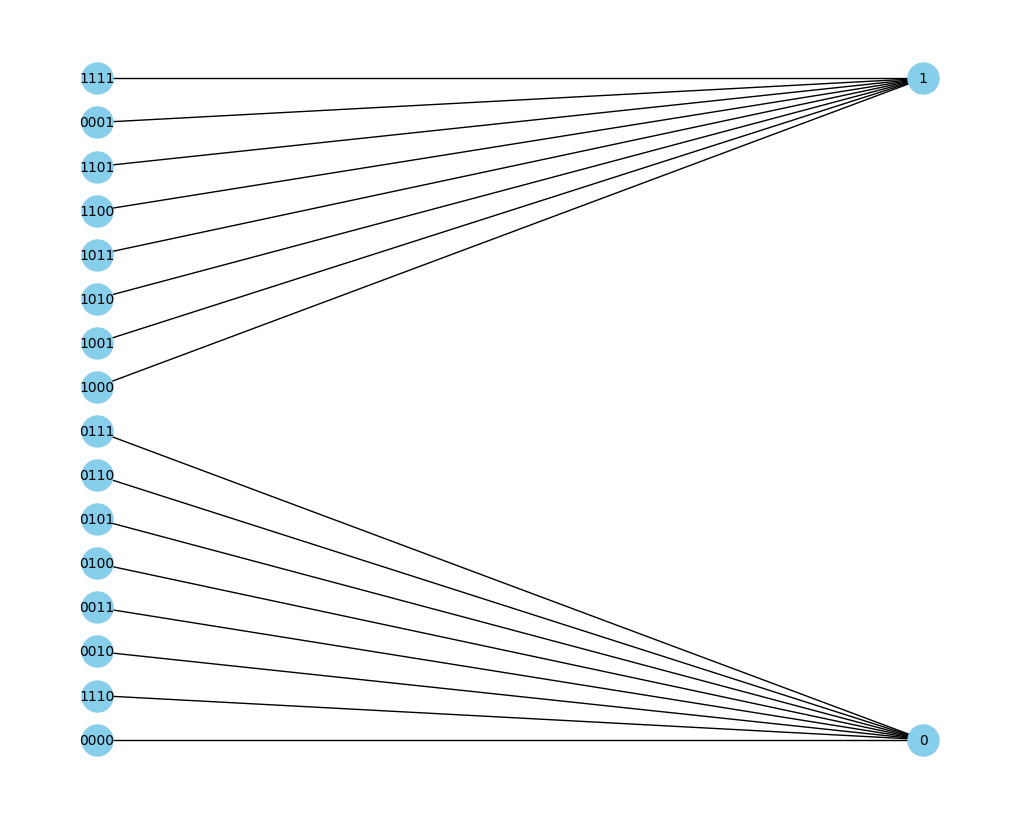

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["0000", "1110", "0010", "0011", "0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","0001","1111"]  
nodes_right = ["0", "1"]  

for node in nodes_left:
    G.add_node(node)

for node in nodes_right:
    G.add_node(node)

for i in range(len(nodes_left)//2):
    G.add_edge(nodes_left[i], "0")
for i in range(len(nodes_left)//2,len(nodes_left)):
    G.add_edge(nodes_left[i], "1")


pos = nx.drawing.layout.bipartite_layout(G, nodes_left)


plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
plt.show()


#### Matriz $U_{f}$ de la tercer funcion balanceada:

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

#Funcion que convierte un entero a binario y lo completa por izquierda con ceros
def convertidor(value, n):
    num = bin(value)[2:]
    valor = str(num)

    faltantes = n - len(valor)

    Cadena = "0" * faltantes + valor 

    return Cadena
#Funcion que calcula el XSOR
def xsor(x,y):
    if (x==y):
        return "0"
    else:
        return "1"

nodes = {"0000" : "0", "1110" : "0", "0010" : "0", "0011" : "0", "0100" : "0","0101" : "0","0110" : "0","0111" : "0","1000" : "1","1001" : "1","1010" : "1","1011" : "1","1100" : "1","1101" : "1","0001" : "1","1111" : "1"}


matrizUf3 = [[0] * 32 for _ in range(32)]

for j in range(0,32):
    valor = (convertidor(j,5))
    x = valor[:4]
    y = valor[-1]
    resultado = x + xsor(y,nodes[x])
    #print (valor,x,y,resultado,int(resultado,2),int(valor,2))
    matrizUf3[int(resultado,2)][int(valor,2)] = 1
    
    
for fila in matrizUf3:
   print(fila)
matrizUf3 = np.array(matrizUf3)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Dibujo de la cuarta funcion constante:

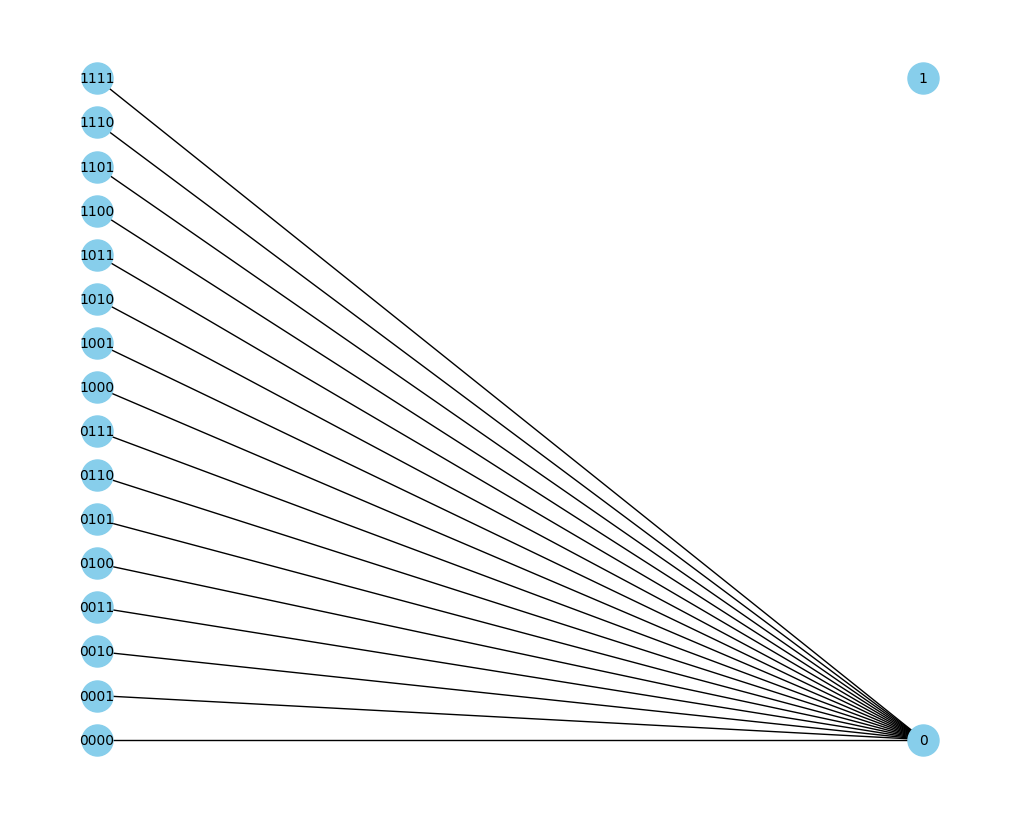

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

nodes_left = ["0000", "0001", "0010", "0011", "0100","0101","0110","0111","1000","1001","1010","1011","1100","1101","1110","1111"]  
nodes_right = ["0", "1"]  

for node in nodes_left:
    G.add_node(node)

for node in nodes_right:
    G.add_node(node)

for i in range(len(nodes_left)):
    G.add_edge(nodes_left[i], "0")


pos = nx.drawing.layout.bipartite_layout(G, nodes_left)

# Dibujar el grafo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10)
plt.show()


#### Matriz $U_{f}$ de la cuarta funcion constante:

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

#Funcion que convierte un entero a binario y lo completa por izquierda con ceros
def convertidor(value, n):
    num = bin(value)[2:]
    valor = str(num)

    faltantes = n - len(valor)

    Cadena = "0" * faltantes + valor 

    return Cadena
#Funcion que calcula el XSOR
def xsor(x,y):
    if (x==y):
        return "0"
    else:
        return "1"

nodes = {"0000" : "0", "0001" : "0", "0010" : "0", "0011" : "0", "0100" : "0","0101" : "0","0110" : "0","0111" : "0","1000" : "0","1001" : "0","1010" : "0","1011" : "0","1100" : "0","1101" : "0","1110" : "0","1111" : "0"}


matrizUf4 = [[0] * 32 for _ in range(32)]

for j in range(0,32):
    valor = (convertidor(j,5))
    x = valor[:4]
    y = valor[-1]
    resultado = x + xsor(y,nodes[x])
    #print (valor,x,y,resultado,int(resultado,2),int(valor,2))
    matrizUf4[int(resultado,2)][int(valor,2)] = 1
    
    
for fila in matrizUf4:
   print(fila)

matrizUf4 = np.array(matrizUf4)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Circuito para cada una de las funciones

A continuacion se presentan los circuitos correspondientes para las funciones, a su vez, se calculan las pruebas, sin embargo, teniendo en cuenta que son 32 pruebas por función:



In [17]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import circuit_drawer, plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import numpy as np

"""
Funciones uf correspondientes para cada funcion, para que se ejecute 
corresctamente el codigo, se debe generar la matriz f1, f2, f3 y f4 con los
programas que generan la matriz para cada función. 
"""
f1=matrizUf1

f2=matrizUf2

f3=matrizUf3

f4=matrizUf4 

Ufs = [f1,f2,f3,f4]


def  circuito(uf):
    for i in range(0,32):
        
        #para n = 4 entran 4 qubits en |x> y uno en |y>
        circuit=QuantumCircuit(5,5)
        
        valor = convertidor(i,5)
        if valor[0] == '1':
            circuit.x(0)
    
        if valor[1] == '1':
            circuit.x(1)

        if valor[2] == '1':
            circuit.x(2)
    
        if valor[3] == '1':
            circuit.x(3)

        if valor[4] == '1':
            circuit.x(4)


        circuit.unitary(Operator(uf),[4,3,2,1,0],label="Función")

        circuit.measure(0, 4)  
        circuit.measure(1, 3)  
        circuit.measure(2, 2)  
        circuit.measure(3, 1)  
        circuit.measure(4, 0) 

        simulator=Aer.get_backend('aer_simulator')
        result=simulator.run(circuit).result()
        counts=result.get_counts()
        print(valor, counts)

        print(circuit_drawer(circuit,output='text'))

for i in range (len(Ufs)):
    print(f"Funcion {i + 1}")
    circuito(Ufs[i])
#entradas()

Funcion 1
00000 {'00000': 1024}
     ┌──────────┐┌─┐            
q_0: ┤4         ├┤M├────────────
     │          │└╥┘┌─┐         
q_1: ┤3         ├─╫─┤M├─────────
     │          │ ║ └╥┘┌─┐      
q_2: ┤2 Función ├─╫──╫─┤M├──────
     │          │ ║  ║ └╥┘┌─┐   
q_3: ┤1         ├─╫──╫──╫─┤M├───
     │          │ ║  ║  ║ └╥┘┌─┐
q_4: ┤0         ├─╫──╫──╫──╫─┤M├
     └──────────┘ ║  ║  ║  ║ └╥┘
c: 5/═════════════╩══╩══╩══╩══╩═
                  4  3  2  1  0 
00001 {'00001': 1024}
          ┌──────────┐┌─┐            
q_0: ─────┤4         ├┤M├────────────
          │          │└╥┘┌─┐         
q_1: ─────┤3         ├─╫─┤M├─────────
          │          │ ║ └╥┘┌─┐      
q_2: ─────┤2 Función ├─╫──╫─┤M├──────
          │          │ ║  ║ └╥┘┌─┐   
q_3: ─────┤1         ├─╫──╫──╫─┤M├───
     ┌───┐│          │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤0         ├─╫──╫──╫──╫─┤M├
     └───┘└──────────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════════╩══╩══╩══╩══╩═
                       4  3  2  1  0 
00010 {'00010': 1024}
 

A continuación se presentan las pruebas correspondientes, teniendo en cuenta que son 32 pruebas por funcion, solo estoy imprimiento los resultados de la siguiente forma:

valor de entrada {resultado}


In [18]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import circuit_drawer, plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import numpy as np


"""
Funciones uf correspondientes para cada funcion, para que se ejecute 
corresctamente el codigo, se debe generar la matriz f1, f2, f3 y f4 con los
programas que generan la matriz para cada función. 
"""

f1=matrizUf1

f2=matrizUf2

f3=matrizUf3

f4=matrizUf4 

Ufs = [f1,f2,f3,f4]


def  circuito(uf):
    for i in range(0,32):
        
        #para n = 4 entran 4 qubits en |x> y uno en |y>
        circuit=QuantumCircuit(5,5)
        
        valor = convertidor(i,5)
        if valor[0] == '1':
            circuit.x(0)
    
        if valor[1] == '1':
            circuit.x(1)

        if valor[2] == '1':
            circuit.x(2)
    
        if valor[3] == '1':
            circuit.x(3)

        if valor[4] == '1':
            circuit.x(4)


        circuit.unitary(Operator(uf),[4,3,2,1,0],label="Función")

    
        circuit.measure(0, 4)  
        circuit.measure(1, 3)  
        circuit.measure(2, 2)  
        circuit.measure(3, 1)  
        circuit.measure(4, 0) 

        simulator=Aer.get_backend('aer_simulator')
        result=simulator.run(circuit).result()
        counts=result.get_counts()
        print(valor, counts)

        (circuit_drawer(circuit,output='text'))

for i in range (len(Ufs)):
    print(f"Funcion {i + 1}")
    circuito(Ufs[i])


Funcion 1
00000 {'00000': 1024}
00001 {'00001': 1024}
00010 {'00010': 1024}
00011 {'00011': 1024}
00100 {'00100': 1024}
00101 {'00101': 1024}
00110 {'00110': 1024}
00111 {'00111': 1024}
01000 {'01000': 1024}
01001 {'01001': 1024}
01010 {'01010': 1024}
01011 {'01011': 1024}
01100 {'01100': 1024}
01101 {'01101': 1024}
01110 {'01110': 1024}
01111 {'01111': 1024}
10000 {'10001': 1024}
10001 {'10000': 1024}
10010 {'10011': 1024}
10011 {'10010': 1024}
10100 {'10101': 1024}
10101 {'10100': 1024}
10110 {'10111': 1024}
10111 {'10110': 1024}
11000 {'11001': 1024}
11001 {'11000': 1024}
11010 {'11011': 1024}
11011 {'11010': 1024}
11100 {'11101': 1024}
11101 {'11100': 1024}
11110 {'11111': 1024}
11111 {'11110': 1024}
Funcion 2
00000 {'00001': 1024}
00001 {'00000': 1024}
00010 {'00010': 1024}
00011 {'00011': 1024}
00100 {'00100': 1024}
00101 {'00101': 1024}
00110 {'00110': 1024}
00111 {'00111': 1024}
01000 {'01000': 1024}
01001 {'01001': 1024}
01010 {'01010': 1024}
01011 {'01011': 1024}
01100 {'0110

### Implementación del algoritmo Deutsch Josza

In [21]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import circuit_drawer, plot_bloch_multivector
from qiskit.quantum_info import Statevector, Operator
import numpy as np


"""
Funciones uf correspondientes para cada funcion, para que se ejecute 
corresctamente el codigo, se debe generar la matriz f1, f2, f3 y f4 con los
programas que generan la matriz para cada función. 
"""
f1=matrizUf1

f2=matrizUf2

f3=matrizUf3

f4=matrizUf4 

Ufs = [f1,f2,f3,f4]

def  deutschJosza(uf):
    #para n = 4 entran 4 qubits en |x> y uno en |y>
    circuit=QuantumCircuit(5,4)
    #Establecemos el q0 4 en 1
    circuit.x(4)
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.h(3)
    circuit.h(4)

    circuit.unitary(Operator(uf),[4,3,2,1,0],label="Función")
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.h(3)

    circuit.measure(0,3)
    circuit.measure(1,2)
    circuit.measure(2,1)
    circuit.measure(3,0)

    simulator=Aer.get_backend('aer_simulator')
    result=simulator.run(circuit).result()
    counts=result.get_counts()
    print(counts)

    #state=Statevector.from_instruction(circuit)
    #plot_bloch_multivector(state)

    print(circuit_drawer(circuit,output='text'))

for i in range (len(Ufs)):
    print(f"Funcion {i + 1}")
    deutschJosza(Ufs[i])

Funcion 1


{'1000': 1024}
     ┌───┐     ┌──────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤4         ├┤ H ├┤M├─────────
     ├───┤     │          │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤3         ├┤ H ├─╫─┤M├──────
     ├───┤     │          │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Función ├┤ H ├─╫──╫─┤M├───
     ├───┤     │          │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤1         ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│          │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤0         ├──────╫──╫──╫──╫─
     └───┘└───┘└──────────┘      ║  ║  ║  ║ 
c: 4/════════════════════════════╩══╩══╩══╩═
                                 3  2  1  0 
Funcion 2
{'1000': 577, '0001': 63, '0100': 76, '1101': 58, '1110': 58, '0010': 59, '1011': 64, '0111': 69}
     ┌───┐     ┌──────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤4         ├┤ H ├┤M├─────────
     ├───┤     │          │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤3         ├┤ H ├─╫─┤M├──────
     ├───┤     │          │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Función ├┤ H ├─╫──╫─┤M├───
     ├───┤     │      

### 4. Explique sus resultados.

En cada sección explique sus resultados con textos y ecuaciones.
Entregue un informe explicando su implementación.